In [1]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.style.use('seaborn-white')
import numpy as np


In [2]:
""" Data set used
    to fit the model """
d_x = np.linspace(-1,1,10);
d_y = -0.3 + 0.5*d_x 
for ii in range (0,10):
    d_y[ii]+=np.random.uniform(0,0.04)
#plt.plot(d_x,d_y,"o")

In [3]:
""" Mesh Grid formed for ploting likelihood function """
    
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)

In [4]:
""" Point for which likelihood density function is estimated """
s_x = 0.95
s_y = 0.01

mean = [0, 0]
cov = [[1, 0], [0, 1]]
ZZ_var = np.zeros((1,10))
ZZ_prior_A = np.zeros((100,100))
ZZ_like_A = np.zeros((100,100))
ZZ_post_A = np.zeros((100,100))
ZZ_post = []


In [5]:
for i in range(100):
    for j in range(100):
        a = X[i,j]
        b = Y[i,j]
        mean = np.dot([a,b],[1,s_x])
        d_prior =multivariate_normal.pdf((a,b), [0,0], [[0.5,0],[0,0.5]])
        d_like =multivariate_normal.pdf(s_y, mean, 0.04)
        d_post = d_prior * d_like
        ZZ_prior_A[i,j] = d_prior
        ZZ_like_A[i,j] = d_like
        ZZ_post_A[i,j] = d_post

        

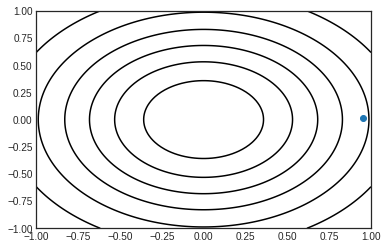

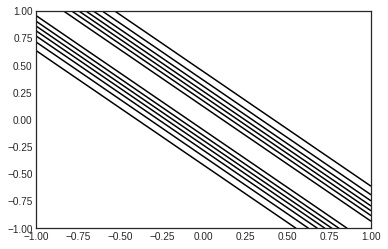

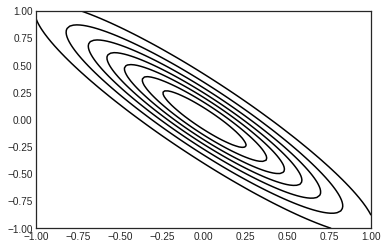

_____________________________________________________________________________


In [6]:
plt.contour(X, Y, ZZ_prior_A, colors='black');
plt.plot(s_x,s_y,"o")
plt.show()  
plt.contour(X, Y, ZZ_like_A, colors='black');
plt.show()
plt.contour(X, Y, ZZ_post_A, colors='black');
plt.show()
print("_____________________________________________________________________________")


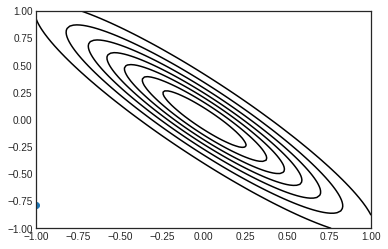

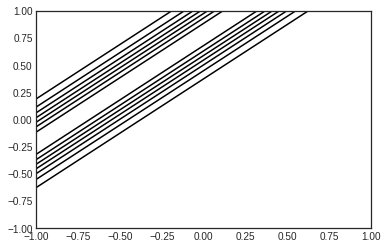

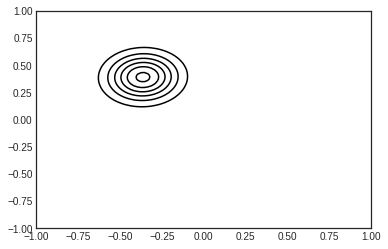

_____________________________________________________________________________


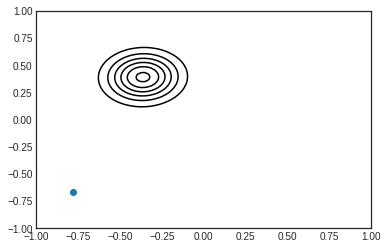

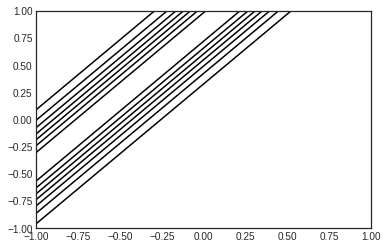

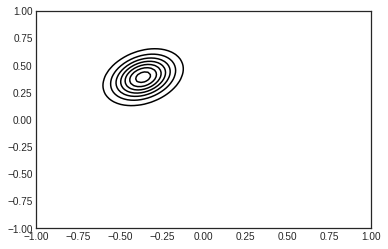

_____________________________________________________________________________


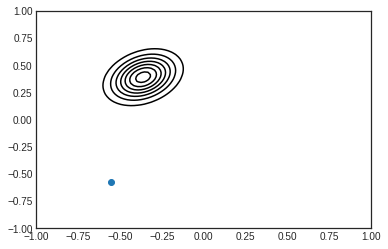

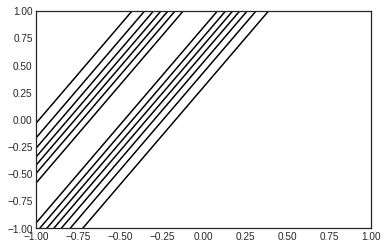

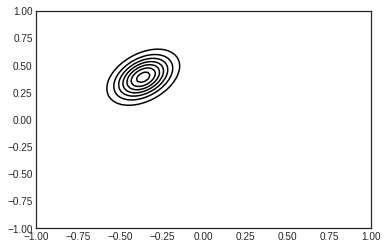

_____________________________________________________________________________


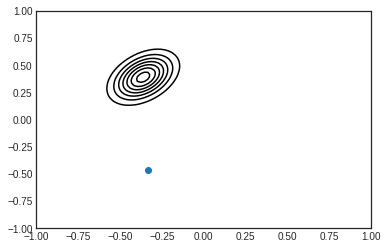

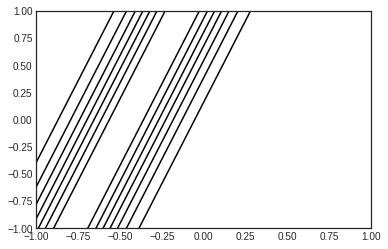

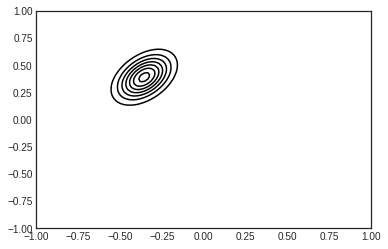

_____________________________________________________________________________


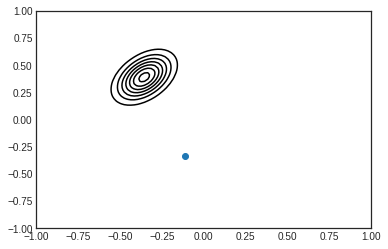

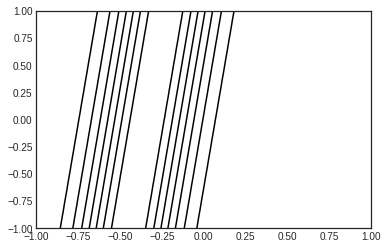

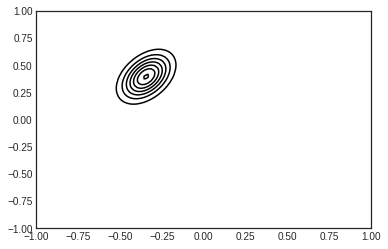

_____________________________________________________________________________


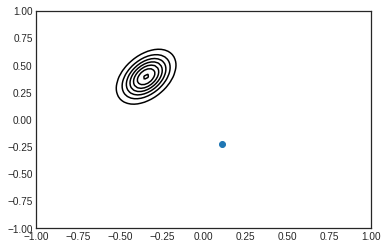

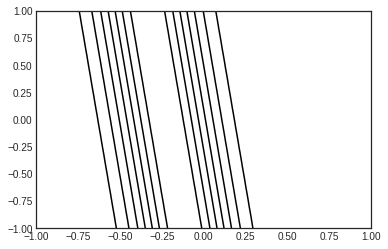

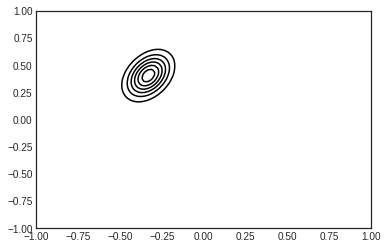

_____________________________________________________________________________


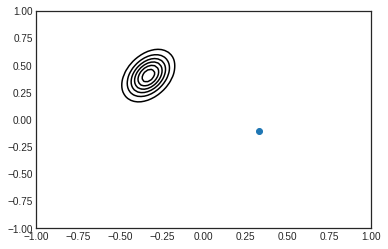

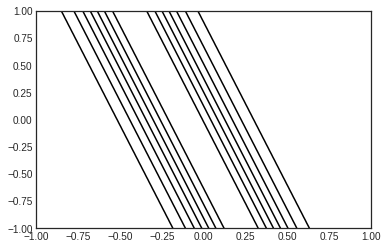

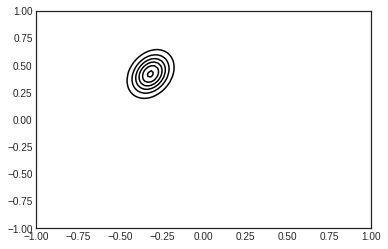

_____________________________________________________________________________


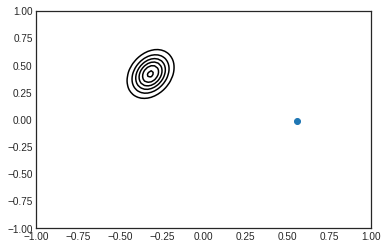

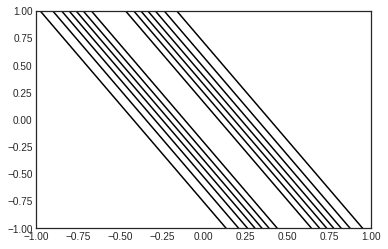

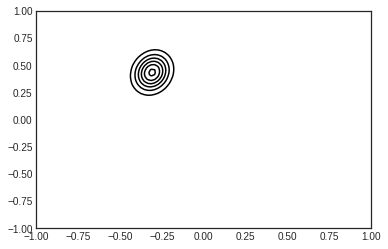

_____________________________________________________________________________


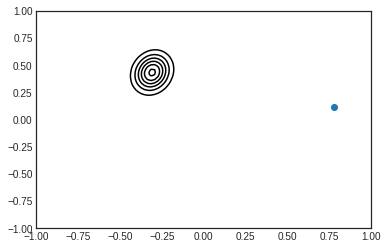

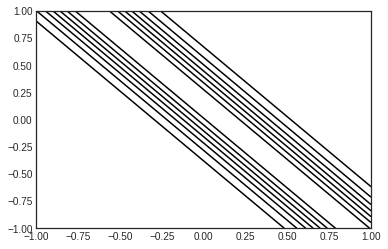

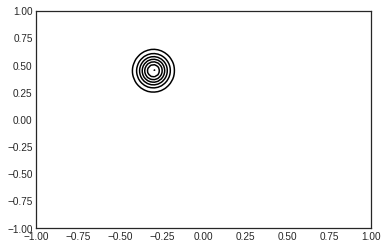

_____________________________________________________________________________


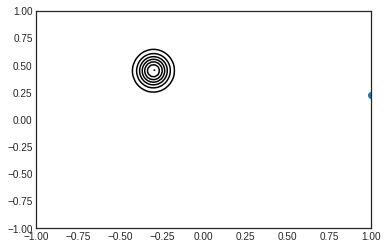

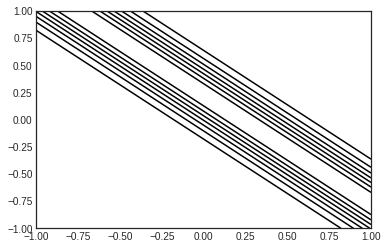

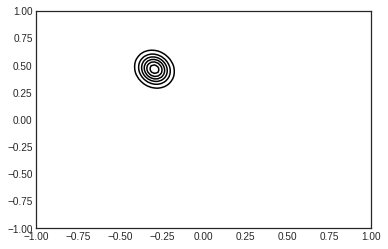

_____________________________________________________________________________


In [7]:
for data in range(0,10):
    
    s_x = d_x[data]
    s_y = d_y[data]
    """ My posterior is new prior now """
    ZZ_prior_A = ZZ_post_A
    plt.contour(X, Y, ZZ_prior_A, colors='black');
    plt.plot(s_x,s_y,"o")
    plt.show()
    for i in range(100):
        for j in range(100):
            a = X[i,j]
            b = Y[i,j]
            mean = np.dot([a,b],[1,s_x])
            d_prior =ZZ_prior_A[i,j]
            d_like =multivariate_normal.pdf(s_y, mean, 0.04)
            d_post = d_prior * d_like
            ZZ_prior_A[i,j] = d_prior
            ZZ_like_A[i,j] = d_like
            ZZ_post_A[i,j] = d_post
#    ZZ_var[data] = np.var(ZZ_post_A)
    plt.contour(X, Y, ZZ_like_A, colors='black');
    plt.show()
    plt.contour(X, Y, ZZ_post_A, colors='black');
    plt.show()
    
    print("_____________________________________________________________________________")
#plt.plot(np.arange(0,10),ZZ_var)
#plt.show()
#from scipy.stats import multivariate_normal
#
#mean = [0, 0]
#cov = [[1, 0], [0, 1]]
#x = np.linspace(0, 5, 10, endpoint=False)
#y = multivariate_normal.pdf(x, mean=2.5, cov=0.5); 
#plt.plot(x, y)